<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [25]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [5]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [6]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [0]:
#merging. The additonal arguments will be there by default
merged = pd.merge(lifespan,population,how='inner',on=['geo','time'])


In [0]:
df = pd.merge(merged,income)

In [0]:
#Merging with entities to get full names and region
df = pd.merge(df,entities[['country', 'name', 'world_4region']], 
              left_on='geo', right_on='country')

In [29]:
df.head()

,geo,time,life_expectancy_years,population_total,income_per_person_gdppercapita_ppp_inflation_adjusted,country,name,world_4region
0,afg,1800,28.21,3280000,603,afg,Afghanistan,asia
1,afg,1801,28.20,3280000,603,afg,Afghanistan,asia
2,afg,1802,28.19,3280000,603,afg,Afghanistan,asia
3,afg,1803,28.18,3280000,603,afg,Afghanistan,asia
4,afg,1804,28.17,3280000,603,afg,Afghanistan,asia


In [0]:
#Renaming to more descriptive names
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_4region': 'region'
})


In [0]:
#slimming by years surrounding the Spanish Flu
years_of_interest = [1917,1918,1919,1920,1921]
df = df[df['year'].isin(years_of_interest)]

In [32]:
df.head(20)

,geo,year,lifespan,population,income,country_code,country,region
117,afg,1917,30.17,5648497,845,afg,Afghanistan,asia
118,afg,1918,7.89,5704092,849,afg,Afghanistan,asia
119,afg,1919,30.28,5758692,853,afg,Afghanistan,asia
120,afg,1920,30.34,5813814,857,afg,Afghanistan,asia
121,afg,1921,30.39,5869464,863,afg,Afghanistan,asia
336,ago,1917,30.99,3463331,1141,ago,Angola,africa
337,ago,1918,12.01,3487015,1174,ago,Angola,africa
338,ago,1919,31.16,3512369,1209,ago,Angola,africa
339,ago,1920,31.24,3537908,1245,ago,Angola,africa
340,ago,1921,31.33,3563632,1285,ago,Angola,africa


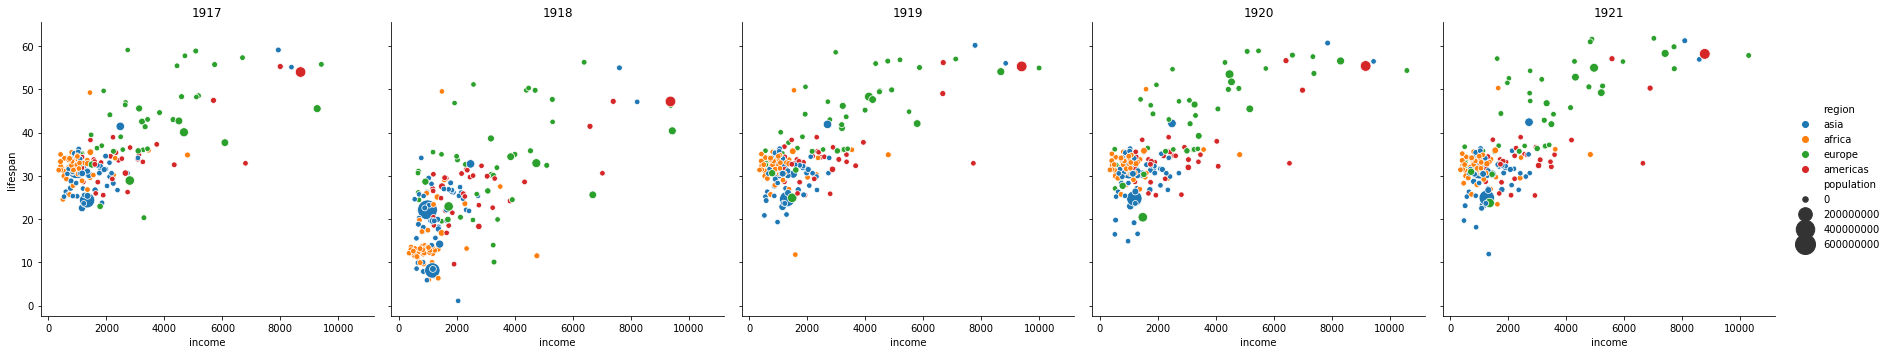

In [34]:
fig = sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                  sizes=(30,400), col='year', data=df)

axes = fig.axes.flatten()
axes[0].set_title('1917')
axes[1].set_title('1918')
axes[2].set_title('1919');
axes[3].set_title('1920');
axes[4].set_title('1921');

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO